<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/4.%20Public%20Health%20and%20Safety/Breast%20Cancer%20Wisconsin%20(Diagnostic)%20Data%20Set/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content
1. [Preparing Project](#1)
    - 1.1 [Connection To Kaggle](#1.1)
    - 1.2 [Downloading Dataset](#1.2)
    - 1.3 [Importing Libraries](#1.3)
    - 1.4 [Importing Dataset](#1.4)
2. [Data Exploration](#2)
    - 2.1 [Getting To Know The DataFrame Variables](#2.1)
    -2.2 [Getting To Know The DataFrame](#2.2)
    -2.3 [Check Datatypes & Unique Values](#2.3)
    -2.4 [Statistical Summary](#2.4)
    -2.5 [Checking Missing Values](#2.5)
        - 2.5.1 [Dealing With Null Values](#2.5.1)
    - 2.6 [Checking Categorical Variables](#2.6)
        - 2.6.1 [Dealing With Categorical Variable](#2.6.1)
        - 2.6.2 [Diagnosis Countplot](#2.6.2)
    - 2.7 [Distribution](#2.7)
    - 2.8 [Correlation Matrix & Heatmap](#2.8)
        - 2.8.1 [Correlation Bar](#2.8.1)
        - 2.8.2 [Correlation Matrix](#2.8.2)
        - 2.8.3 [Correlation Heatmap](#2.8.3)
3. [Preparing For Modelling](#3)
    - 3.1 [Spliting Dataset to Train & Test Set](#3.1)
    - 3.2 [Feature Scaling](#3.2)
4. [Modelling](#4)
    - 4.1 [Logistic Regression](#4.1)
        - 4.1.1 [Cross Validation](#4.1.1)
    - 4.2 [RandomForestClassifier](#4.2)
        - 4.2.1 [Cross Validation](#4.2.1)
    - 4.3 [Hyperparameter Tuning](#4.3)
    - 4.4 [Final Model (LogisticRegression)](#4.4)
        - 4.4.1 [Cross Validation](#4.4.1)

## Connection To Kaggle <a id=1.1></a>

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

[Dataset Link](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Downloading Dataset <a id=1.2></a>

In [2]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 44.6MB/s]


In [3]:
!unzip "breast-cancer-wisconsin-data.zip"

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


## Importing Libraries <a id=1.3></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset <a id=1.4></a>

In [37]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Exploration <a id=2></a>

## Getting To Know The DataFrame Variables <a id=2.1></a>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1. **id**: Unique identifier for each patient (integer).
2. **diagnosis**: Diagnosis of the breast mass ('M' = malignant, 'B' = benign) (object/string).
3. **radius_mean**: Mean radius (average of distances from the center to points on the perimeter) of the cell nuclei (float).
4. **texture_mean**: Mean texture (standard deviation of gray-scale values) of the cell nuclei (float).
5. **perimeter_mean**: Mean perimeter of the cell nuclei (float).
6. **area_mean**: Mean area of the cell nuclei (float).
7. **smoothness_mean**: Mean smoothness (local variation in radius lengths) of the cell nuclei (float).
8. **compactness_mean**: Mean compactness (perimeter^2 / area - 1.0) of the cell nuclei (float).
9. **concavity_mean**: Mean concavity (severity of concave portions of the contour) of the cell nuclei (float).
10. **concave points_mean**: Mean number of concave points on the cell nuclei (float).
11. **symmetry_mean**: Mean symmetry of the cell nuclei (float).
12. **fractal_dimension_mean**: Mean fractal dimension (coastline approximation - 1) of the cell nuclei (float).
13. **radius_se**: Standard error of the radius of the cell nuclei (float).
14. **texture_se**: Standard error of the texture of the cell nuclei (float).
15. **perimeter_se**: Standard error of the perimeter of the cell nuclei (float).
16. **area_se**: Standard error of the area of the cell nuclei (float).
17. **smoothness_se**: Standard error of the smoothness of the cell nuclei (float).
18. **compactness_se**: Standard error of the compactness of the cell nuclei (float).
19. **concavity_se**: Standard error of the concavity of the cell nuclei (float).
20. **concave points_se**: Standard error of the number of concave points on the cell nuclei (float).
21. **symmetry_se**: Standard error of the symmetry of the cell nuclei (float).
22. **fractal_dimension_se**: Standard error of the fractal dimension of the cell nuclei (float).
23. **radius_worst**: Worst (largest) radius of the cell nuclei (float).
24. **texture_worst**: Worst texture of the cell nuclei (float).
25. **perimeter_worst**: Worst perimeter of the cell nuclei (float).
26. **area_worst**: Worst area of the cell nuclei (float).
27. **smoothness_worst**: Worst smoothness of the cell nuclei (float).
28. **compactness_worst**: Worst compactness of the cell nuclei (float).
29. **concavity_worst**: Worst concavity of the cell nuclei (float).
30. **concave points_worst**: Worst number of concave points on the cell nuclei (float).
31. **symmetry_worst**: Worst symmetry of the cell nuclei (float).
32. **fractal_dimension_worst**: Worst fractal dimension of the cell nuclei (float).
33. **Unnamed: 32**: Column with no data (likely an artifact of data processing with no significant information) (float).

## Getting To Know The DataFrame <a id=2.2></a>

In [7]:
df.shape

(569, 33)

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Check Datatypes & Unique Values <a id=2.3></a>

In [13]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [14]:
df.select_dtypes(include='number').columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
len(df.select_dtypes(include='number').columns)

32

_Totally we have 32 variables with numeric data type (including `int` & `float`)_

In [23]:
# Number of unique value for each variable
pd.DataFrame(df.nunique(), columns=['Count'])

,Count
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


## Statistical Summary <a id=2.4></a>

In [16]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


__Analysis Of Statistical Summary__:

Certainly! Here is an explanation of the statistics for each variable in the dataset:

1. **id**:
   - **count**: 569 - The number of entries.
   - **mean**: 30,371,830 - The average id value.
   - **std**: 125,020,600 - The standard deviation, indicating high variance.
   - **min**: 8,670 - The smallest id value.
   - **25%**: 869,218 - The id value below which 25% of the ids fall.
   - **50%**: 906,024 - The median id value.
   - **75%**: 8,813,129 - The id value below which 75% of the ids fall.
   - **max**: 911,320,500 - The largest id value.

2. **radius_mean**:
   - **count**: 569
   - **mean**: 14.13
   - **std**: 3.52
   - **min**: 6.98
   - **25%**: 11.70
   - **50%**: 13.37
   - **75%**: 15.78
   - **max**: 28.11

3. **texture_mean**:
   - **count**: 569
   - **mean**: 19.29
   - **std**: 4.30
   - **min**: 9.71
   - **25%**: 16.17
   - **50%**: 18.84
   - **75%**: 21.80
   - **max**: 39.28

4. **perimeter_mean**:
   - **count**: 569
   - **mean**: 91.97
   - **std**: 24.30
   - **min**: 43.79
   - **25%**: 75.17
   - **50%**: 86.24
   - **75%**: 104.10
   - **max**: 188.50

5. **area_mean**:
   - **count**: 569
   - **mean**: 654.89
   - **std**: 351.91
   - **min**: 143.50
   - **25%**: 420.30
   - **50%**: 551.10
   - **75%**: 782.70
   - **max**: 2501.00

6. **smoothness_mean**:
   - **count**: 569
   - **mean**: 0.096
   - **std**: 0.014
   - **min**: 0.053
   - **25%**: 0.086
   - **50%**: 0.096
   - **75%**: 0.105
   - **max**: 0.163

7. **compactness_mean**:
   - **count**: 569
   - **mean**: 0.104
   - **std**: 0.053
   - **min**: 0.019
   - **25%**: 0.065
   - **50%**: 0.093
   - **75%**: 0.130
   - **max**: 0.345

8. **concavity_mean**:
   - **count**: 569
   - **mean**: 0.089
   - **std**: 0.080
   - **min**: 0.000
   - **25%**: 0.030
   - **50%**: 0.062
   - **75%**: 0.131
   - **max**: 0.427

9. **concave points_mean**:
   - **count**: 569
   - **mean**: 0.049
   - **std**: 0.039
   - **min**: 0.000
   - **25%**: 0.020
   - **50%**: 0.034
   - **75%**: 0.074
   - **max**: 0.201

10. **symmetry_mean**:
    - **count**: 569
    - **mean**: 0.181
    - **std**: 0.027
    - **min**: 0.106
    - **25%**: 0.162
    - **50%**: 0.179
    - **75%**: 0.196
    - **max**: 0.304

11. **fractal_dimension_mean**:
    - **count**: 569
    - **mean**: 0.062
    - **std**: 0.007
    - **min**: 0.050
    - **25%**: 0.057
    - **50%**: 0.061
    - **75%**: 0.066
    - **max**: 0.097

12. **radius_se**:
    - **count**: 569
    - **mean**: 0.405
    - **std**: 0.278
    - **min**: 0.111
    - **25%**: 0.232
    - **50%**: 0.324
    - **75%**: 0.478
    - **max**: 2.873

13. **texture_se**:
    - **count**: 569
    - **mean**: 1.216
    - **std**: 0.551
    - **min**: 0.360
    - **25%**: 0.833
    - **50%**: 1.108
    - **75%**: 1.474
    - **max**: 4.885

14. **perimeter_se**:
    - **count**: 569
    - **mean**: 2.866
    - **std**: 2.022
    - **min**: 0.757
    - **25%**: 1.606
    - **50%**: 2.287
    - **75%**: 3.357
    - **max**: 21.980

15. **area_se**:
    - **count**: 569
    - **mean**: 40.34
    - **std**: 45.49
    - **min**: 6.80
    - **25%**: 23.24
    - **50%**: 30.37
    - **75%**: 45.19
    - **max**: 542.20

16. **smoothness_se**:
    - **count**: 569
    - **mean**: 0.007
    - **std**: 0.004
    - **min**: 0.002
    - **25%**: 0.006
    - **50%**: 0.007
    - **75%**: 0.009
    - **max**: 0.031

17. **compactness_se**:
    - **count**: 569
    - **mean**: 0.025
    - **std**: 0.017
    - **min**: 0.002
    - **25%**: 0.013
    - **50%**: 0.020
    - **75%**: 0.032
    - **max**: 0.135

18. **concavity_se**:
    - **count**: 569
    - **mean**: 0.031
    - **std**: 0.030
    - **min**: 0.000
    - **25%**: 0.015
    - **50%**: 0.025
    - **75%**: 0.038
    - **max**: 0.396

19. **concave points_se**:
    - **count**: 569
    - **mean**: 0.011
    - **std**: 0.010
    - **min**: 0.000
    - **25%**: 0.006
    - **50%**: 0.010
    - **75%**: 0.014
    - **max**: 0.053

20. **symmetry_se**:
    - **count**: 569
    - **mean**: 0.021
    - **std**: 0.008
    - **min**: 0.008
    - **25%**: 0.015
    - **50%**: 0.019
    - **75%**: 0.024
    - **max**: 0.079

21. **fractal_dimension_se**:
    - **count**: 569
    - **mean**: 0.004
    - **std**: 0.003
    - **min**: 0.001
    - **25%**: 0.002
    - **50%**: 0.003
    - **75%**: 0.006
    - **max**: 0.030

22. **radius_worst**:
    - **count**: 569
    - **mean**: 16.27
    - **std**: 4.83
    - **min**: 7.93
    - **25%**: 13.01
    - **50%**: 14.97
    - **75%**: 18.79
    - **max**: 36.04

23. **texture_worst**:
    - **count**: 569
    - **mean**: 25.68
    - **std**: 6.15
    - **min**: 12.02
    - **25%**: 21.08
    - **50%**: 25.41
    - **75%**: 29.72
    - **max**: 49.54

24. **perimeter_worst**:
    - **count**: 569
    - **mean**: 107.26
    - **std**: 33.60
    - **min**: 50.41
    - **25%**: 84.11
    - **50%**: 97.66
    - **75%**: 125.40
    - **max**: 251.20

25. **area_worst**:
    - **count**: 569
    - **mean**: 880.58
    - **std**: 569.36
    - **min**: 185.20
    - **25%**: 515.30
    - **50%**: 686.50
    - **75%**: 1084.00
    - **max**: 4254.00

26. **smoothness_worst**:
    - **count**: 569
    - **mean**: 0.132
    - **std**: 0.023
    - **min**: 0.071
    - **25%**: 0.117
    - **50%**: 0.131
    - **75%**: 0.146
    - **max**: 0.223

27. **compactness_worst**:
    - **count**: 569
    - **mean**: 0.254
    - **std**: 0.157
    - **min**: 0.027
    - **25%**: 0.147
    - **50%**: 0.212
    - **75%**: 0.339
    - **max**: 1.058

28. **concavity_worst**:
    - **count**: 569
    - **mean**: 0.272
    - **std**: 0.209
    - **min**: 0.000
    - **25%**: 0.115
    - **50%**: 0.227
    - **75%**: 0.383
    - **max**: 1.252

29. **concave points_worst**:
    - **count**: 569
    - **mean**: 0.115
    - **std**: 0.066
    - **min**: 0.000
    - **25%**: 0.065
    - **50%**: 0.100
    - **75%**: 0.161
    - **max**: 0.291

30. **symmetry_worst**:
    - **count**: 569
    - **mean**: 0.290
    - **std**: 0.062
    - **min**: 0.157
    - **25%**: 0.250
    - **50%**: 0.282
    - **75%**: 0.318
    - **max**: 0.664

31. **fractal_dimension_worst**:
    - **count**: 569
    - **mean**: 0.084
    - **std**: 0.018
    - **min**: 0.055
    - **25%**: 0.071
    - **50%**: 0.080
    - **75%**: 0.092
    - **max**: 0.208

32. **Unnamed: 32**:
    - **count**: 0 - No non-null values.
    - **mean**: NaN - Not applicable.
    - **std**: NaN - Not applicable.
    - **min**: NaN - Not applicable.
    - **25%**: NaN - Not applicable.
    - **50%**: NaN - Not applicable.
    - **75%**: NaN - Not applicable.
    - **max**: NaN - Not applicable.

## Checking Missing Values <a id=2.5></a>

In [24]:
# To check whether we have null values
df.isnull().values.any()

True

In [25]:
# To check total NaNs
df.isnull().values.sum()

569

In [26]:
# To check columns with NaN
df.columns[df.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [27]:
df['Unnamed: 32'].count()

0

### Dealing With Null Values <a id=2.5.1></a>

In [38]:
df = df.drop('Unnamed: 32', axis=1)
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [39]:
df.columns[df.isnull().any()]

Index([], dtype='object')

## Checking Categorical Variables <a id=2.6></a>

In [40]:
# As we check previously there is only 1 column with categorical values
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [41]:
pd.DataFrame(df['diagnosis'].unique())

,0
0,M
1,B


### Dealing With Categorical Variable <a id=2.6.1></a>
_Using OneHotEncoding To Encode `diagnosis` Variable_

In [42]:
df = pd.get_dummies(data=df, drop_first=True, columns=['diagnosis'], dtype='int')

In [43]:
df.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


### Diagnosis Countplot <a id=2.6.2></a>

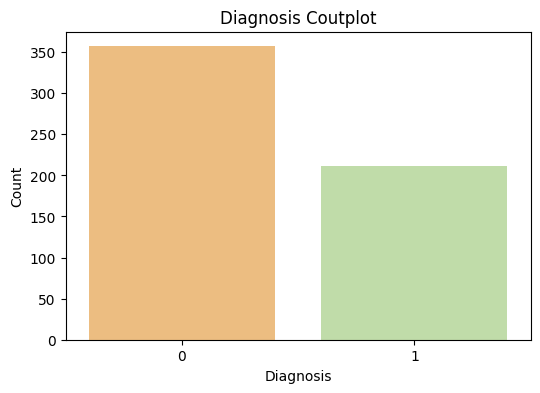

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['diagnosis_M'], label='Count', palette='Spectral')
plt.title("Diagnosis Coutplot", fontsize=12)
plt.xlabel("Diagnosis", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [55]:
# 0 Is B Values
(df.diagnosis_M == 0).sum()

357

In [56]:
# 1 Is M Values
(df.diagnosis_M == 1).sum()

212

## Distributions <a id=2.7></a>

In [187]:
def dist(col):
    plt.figure(figsize=(5,5))
    sns.set_style('darkgrid')
    sns.distplot(df[col], bins='auto', color='b')
    plt.title(f"{col}'s Distribution")
    plt.show()

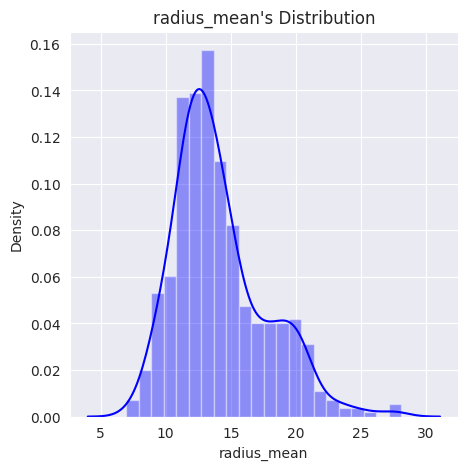

In [188]:
dist('radius_mean')

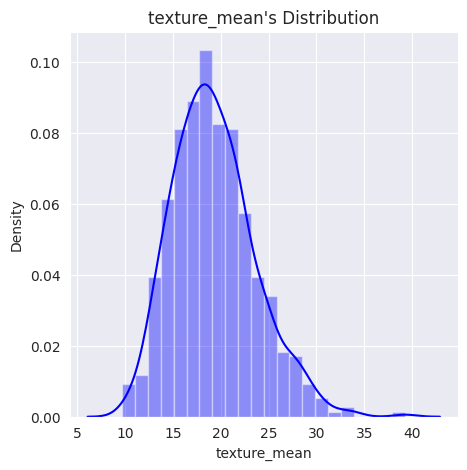

In [189]:
dist('texture_mean')

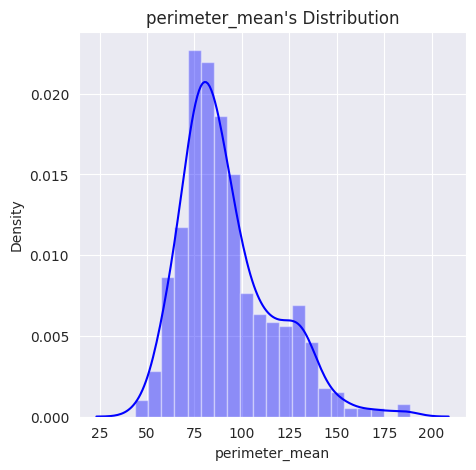

In [190]:
dist('perimeter_mean')

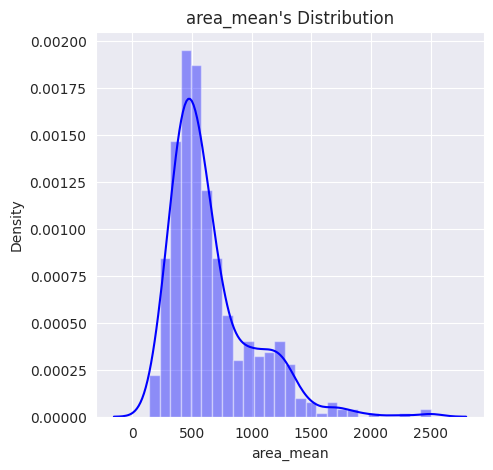

In [191]:
dist('area_mean')

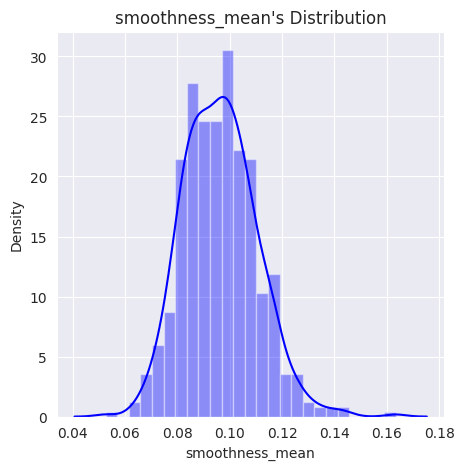

In [192]:
dist('smoothness_mean')

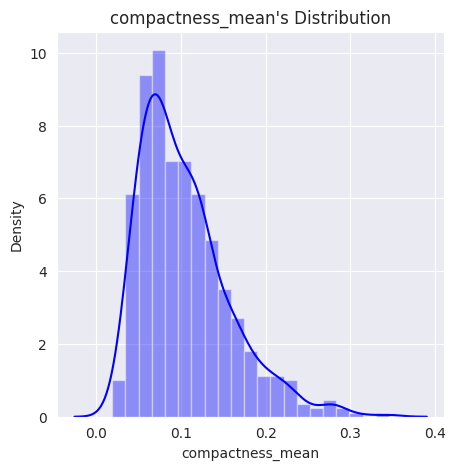

In [193]:
dist('compactness_mean')

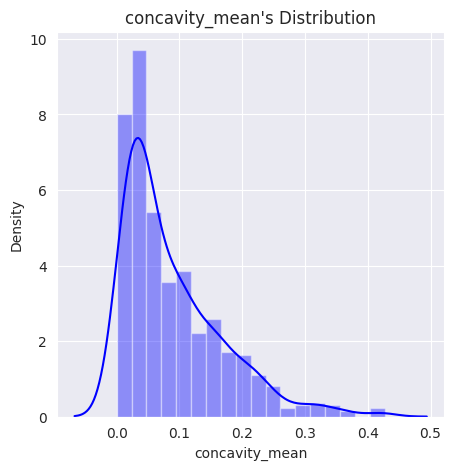

In [194]:
dist('concavity_mean')

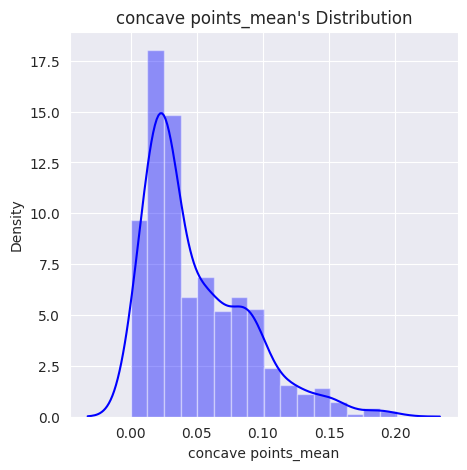

In [195]:
dist('concave points_mean')

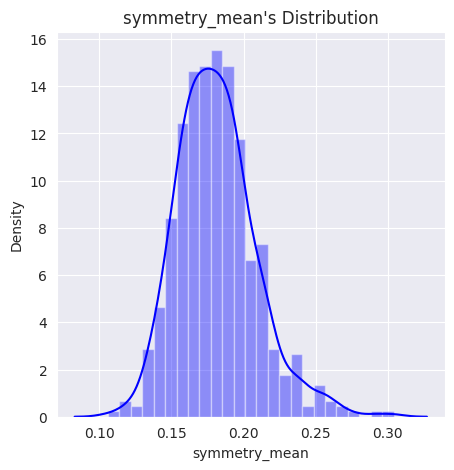

In [196]:
dist('symmetry_mean')

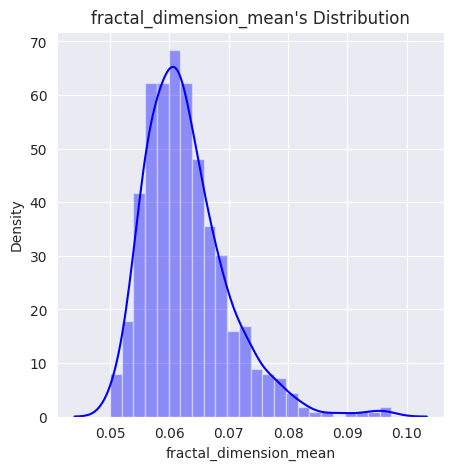

In [197]:
dist('fractal_dimension_mean')

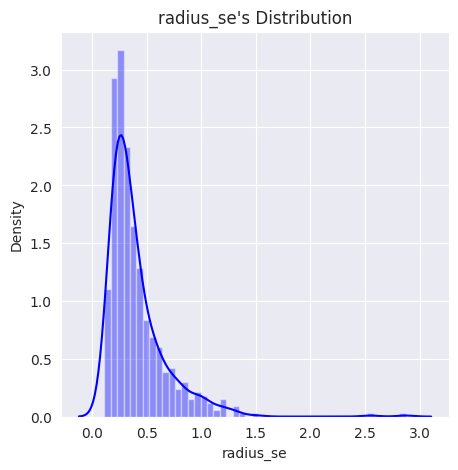

In [198]:
dist('radius_se')

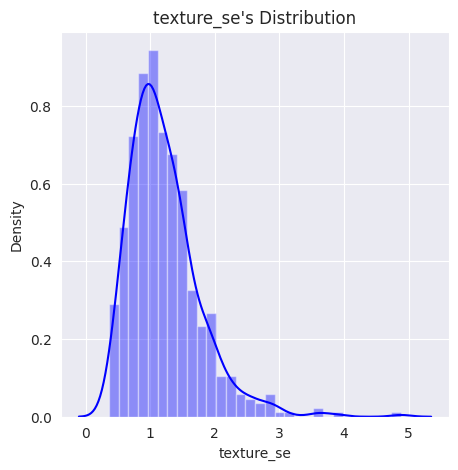

In [199]:
dist('texture_se')

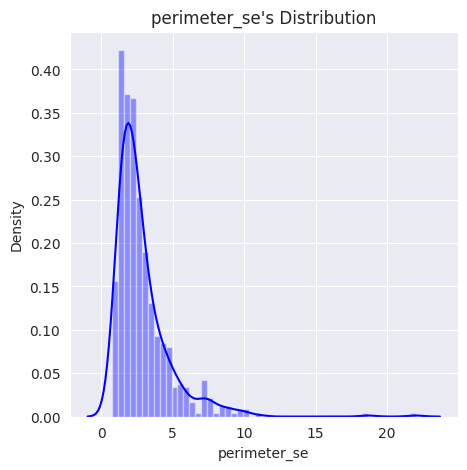

In [200]:
dist('perimeter_se')

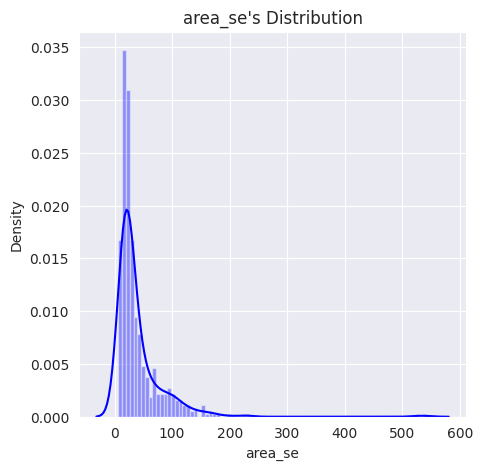

In [201]:
dist('area_se')

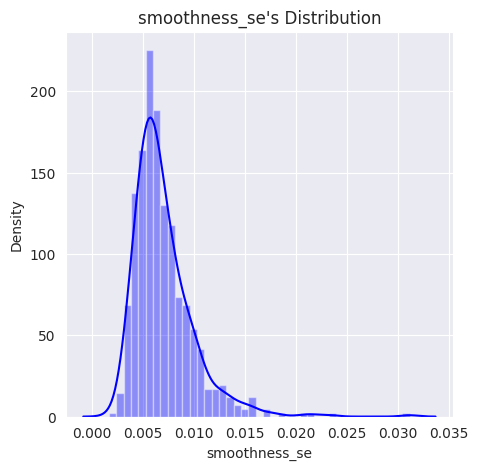

In [202]:
dist('smoothness_se')

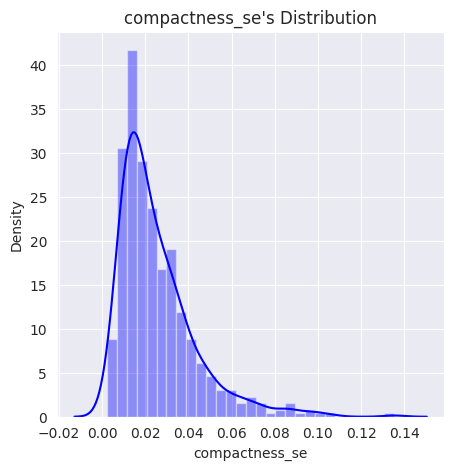

In [203]:
dist('compactness_se')

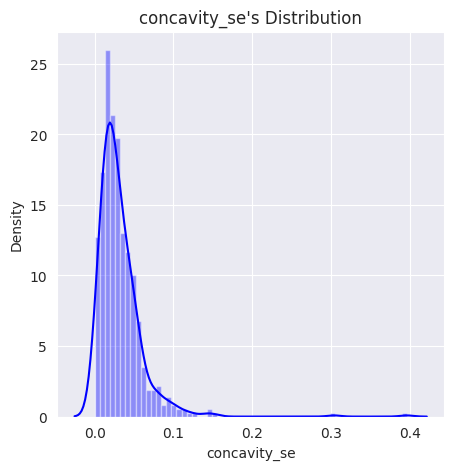

In [204]:
dist('concavity_se')

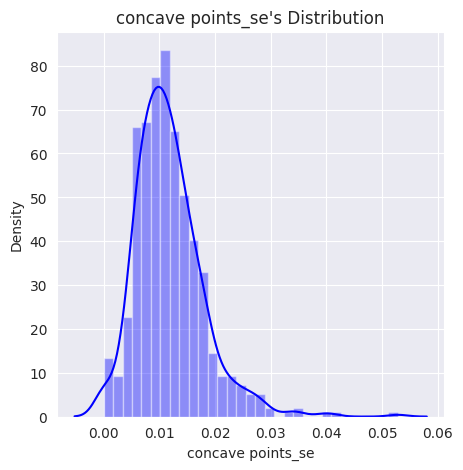

In [205]:
dist('concave points_se')

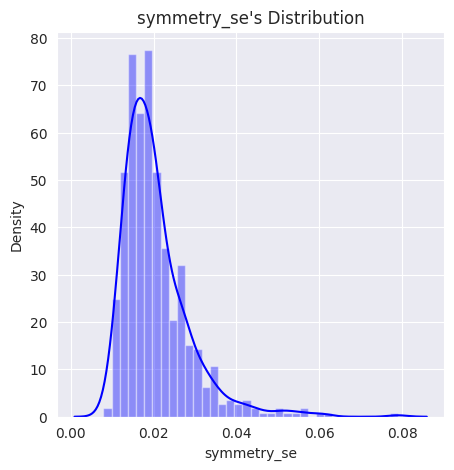

In [206]:
dist('symmetry_se')

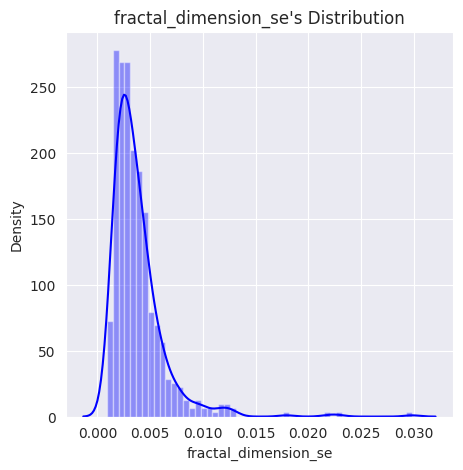

In [207]:
dist('fractal_dimension_se')

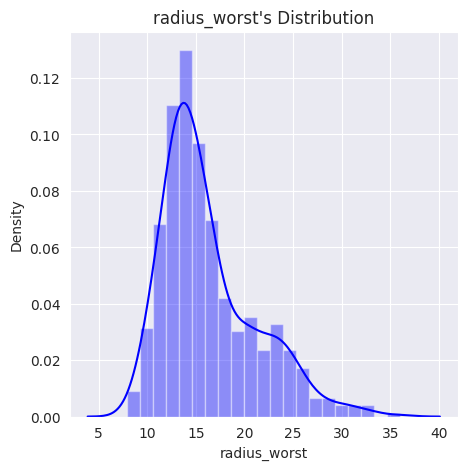

In [208]:
dist('radius_worst')

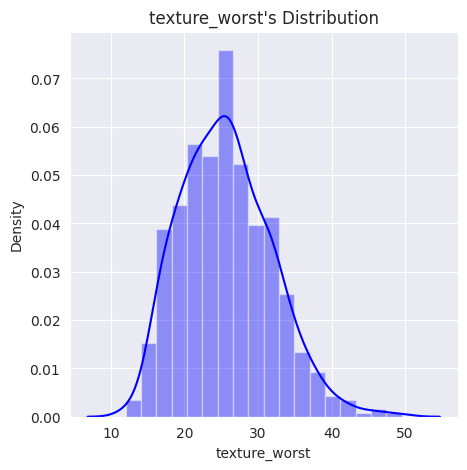

In [209]:
dist('texture_worst')

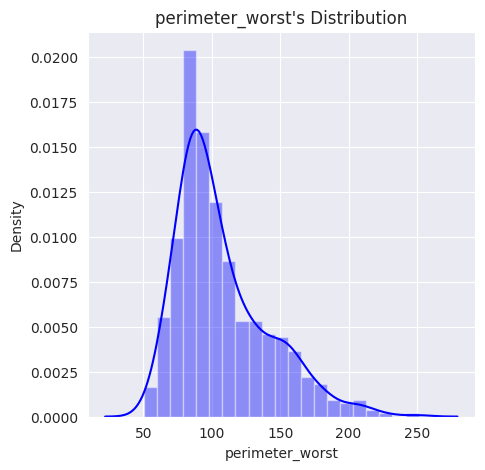

In [210]:
dist('perimeter_worst')

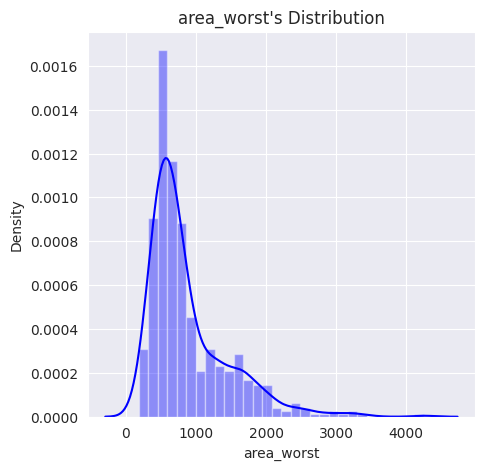

In [211]:
dist('area_worst')

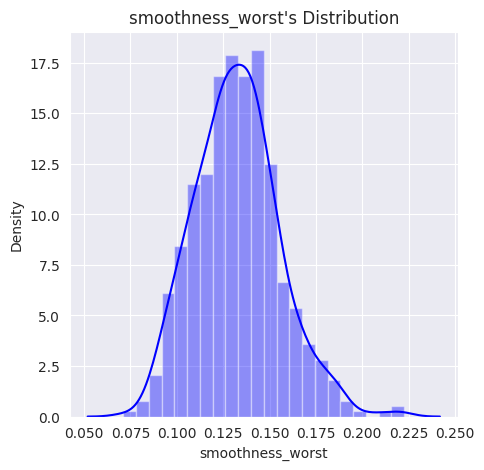

In [212]:
dist('smoothness_worst')

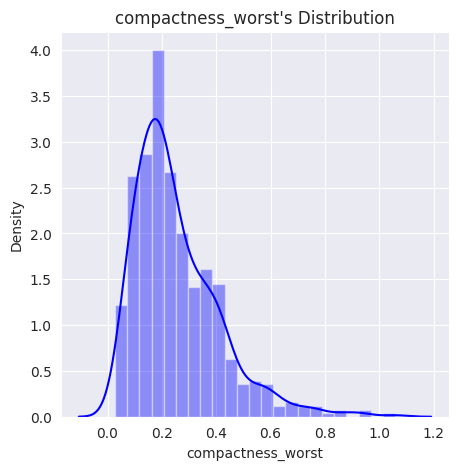

In [213]:
dist('compactness_worst')

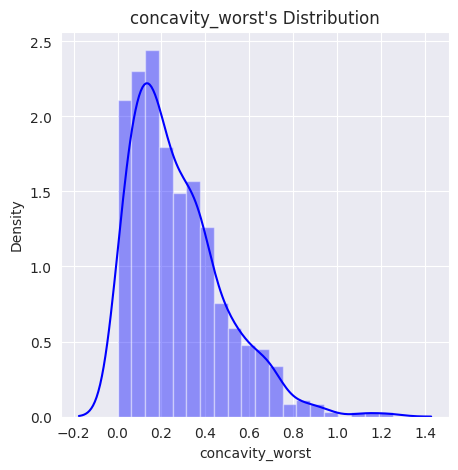

In [214]:
dist('concavity_worst')

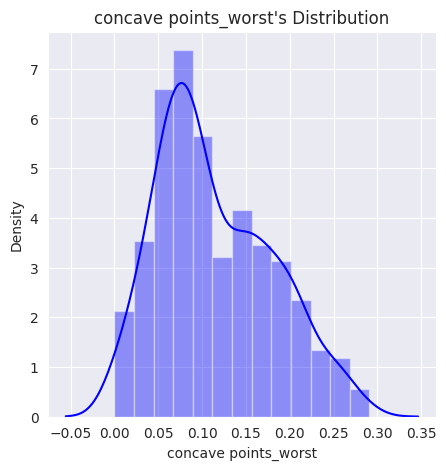

In [215]:
dist('concave points_worst')

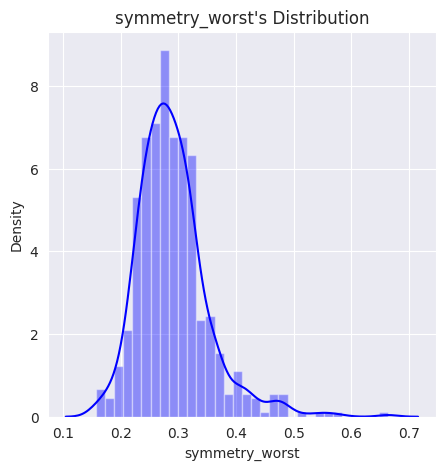

In [216]:
dist('symmetry_worst')

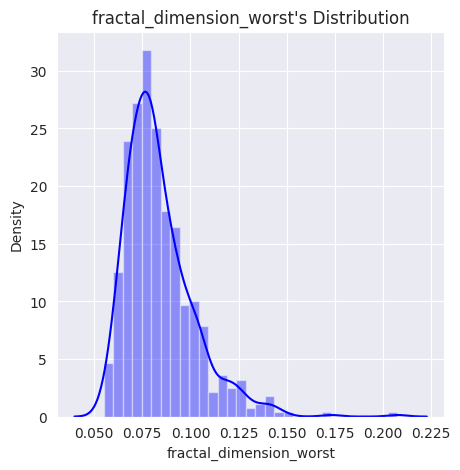

In [217]:
dist('fractal_dimension_worst')

# Correlation Matrix & Heatmap <a id=2.8></a>

In [62]:
df_2 = df.drop(columns='diagnosis_M', axis=1)
df_2.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


## Correlation Bar <a id=2.8.1></a>

<Axes: title={'center': 'Correlated With diagnosis_M'}>

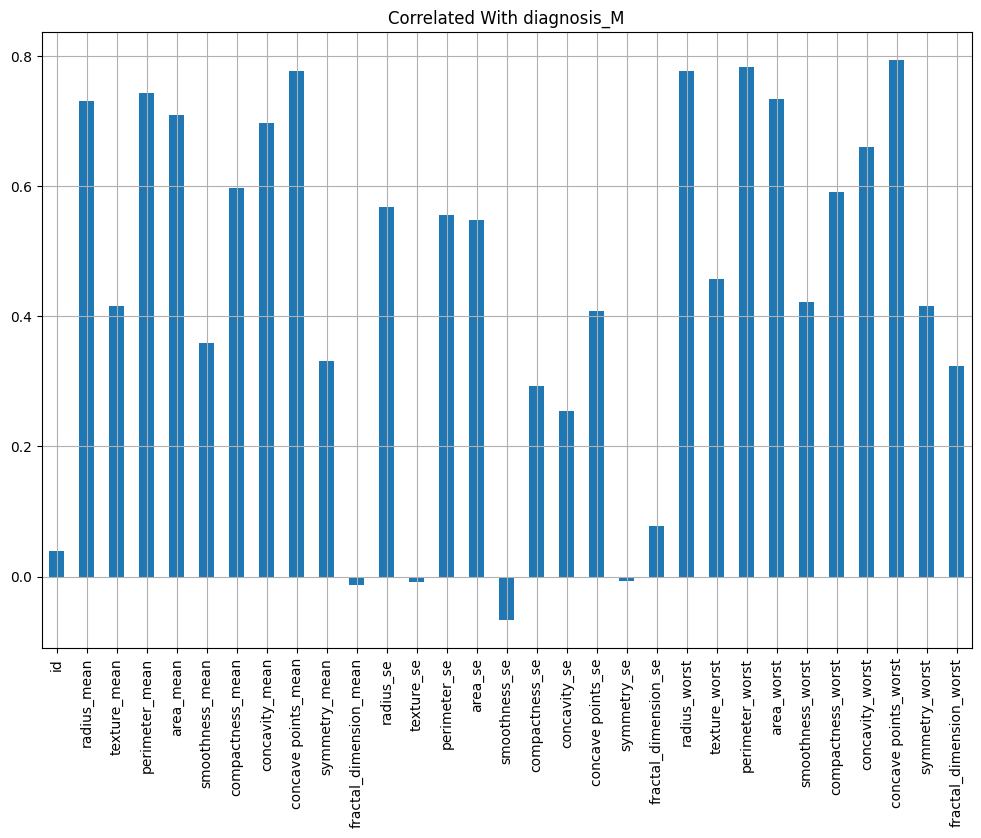

In [67]:
df_2.corrwith(df['diagnosis_M']).plot.bar(
    figsize=(12, 8),
    title='Correlated With diagnosis_M',
    rot=90,
    grid=True
)

## Correlation Matrix <a id=2.8.2></a>

In [68]:
df_corr = df.corr(numeric_only=True)
df_corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


## Correlation Heatmap <a id=2.8.3></a>

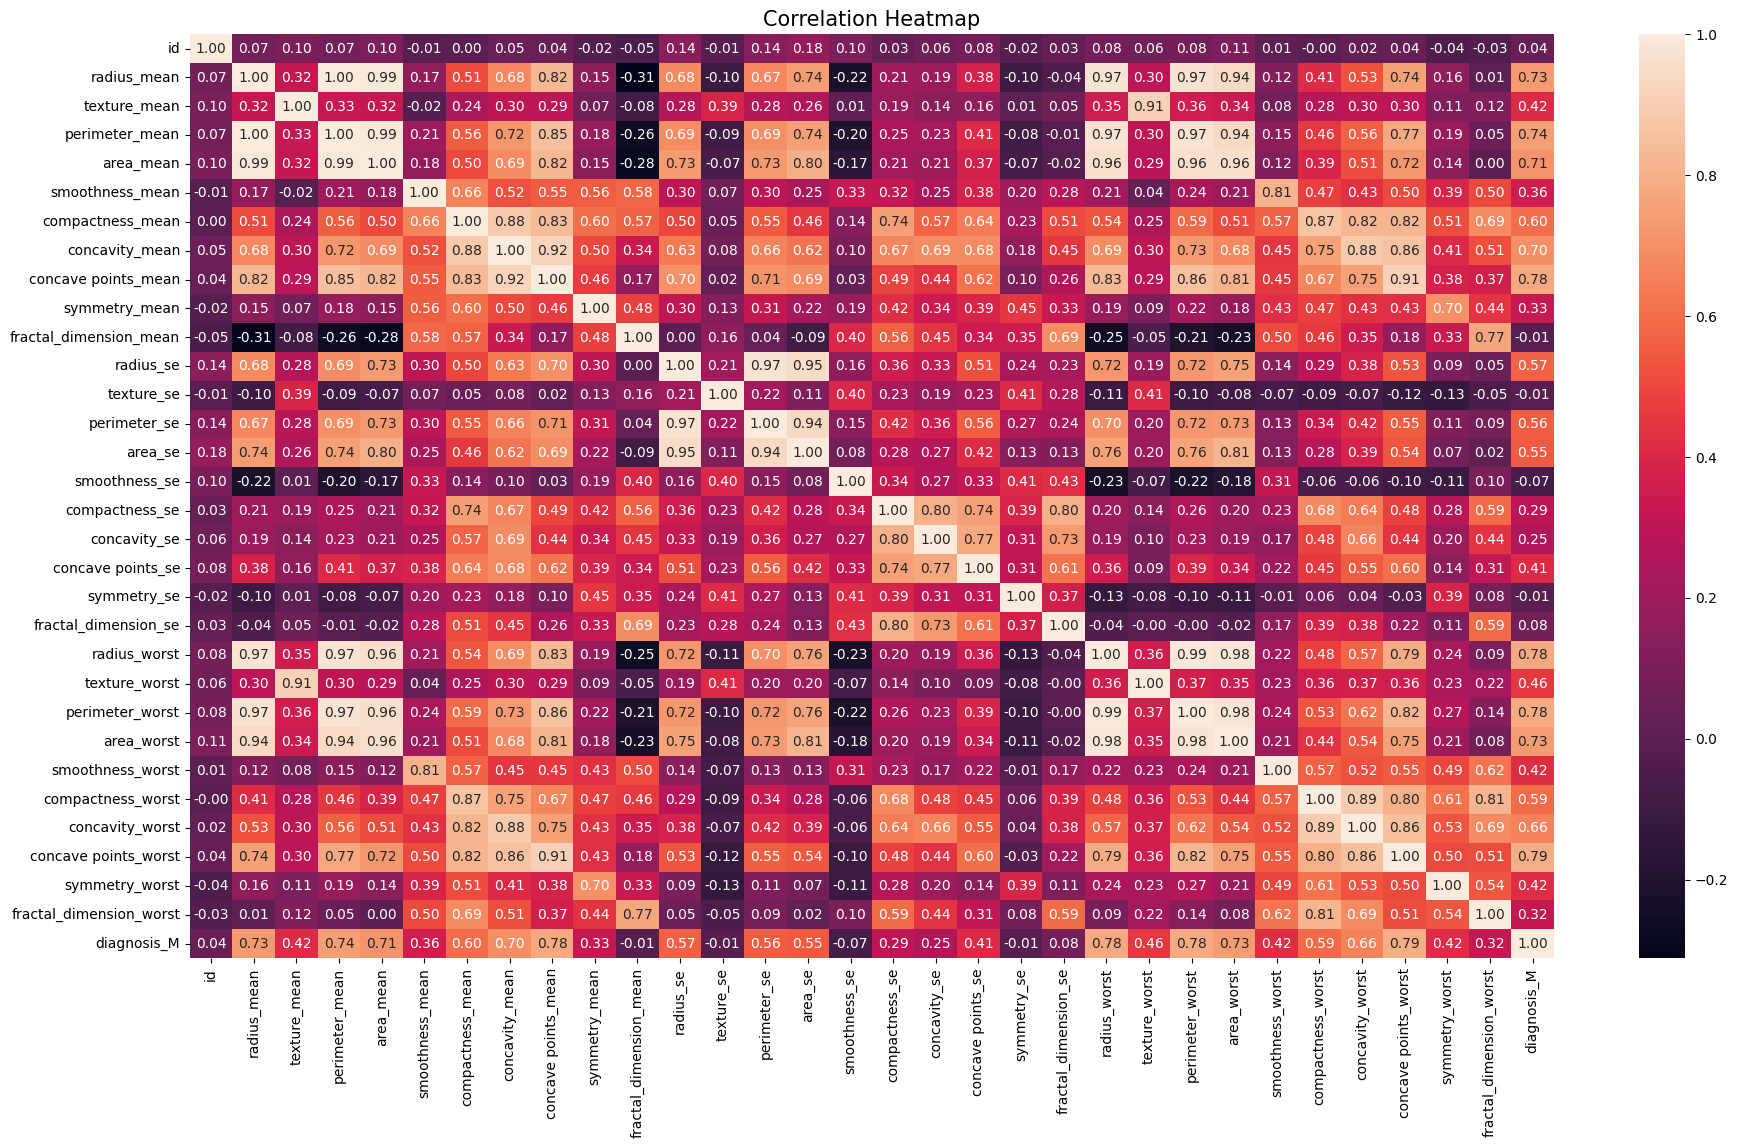

In [74]:
plt.figure(figsize=(22, 12))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

# Preparing For Modelling <a id=3></a>

## Spliting Dataset to Train & Test Set

In [75]:
from sklearn.model_selection import train_test_split

# Independent
X = df.iloc[:, 1:-1].values
# Dependent
y = df.iloc[:, -1].values

In [76]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [77]:
# Spliting train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
# Check Shape of Train & Test
print(f"X_train: ", X_train.shape)
print(f"X_test: ", X_test.shape)
print(f"y_train: ", y_train.shape)
print(f"y_test: ", y_test.shape)

X_train:  (455, 30)
X_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


## Feature Scaling <a id=3.2></a>
_Using StandardScaler_

In [79]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
print(X_train)

[[-1.15036482 -0.39064196 -1.12855021 ... -0.75798367 -0.01614761
  -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 ... -0.60687023  0.09669004
  -0.38615797]
 [ 0.574121   -1.03333557  0.51394098 ... -0.02371948 -0.20050207
  -0.75144254]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.97974953 -0.71542314
  -0.11978123]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.75401433 -1.58157125
  -1.00601779]
 [-0.73694129  1.14989702 -0.71226578 ... -0.27460457 -1.25895095
   0.21515662]]


In [82]:
print(X_test)

[[-0.20175604  0.3290786  -0.13086754 ...  1.3893291   1.08203284
   1.54029664]
 [-0.25555773  1.46763319 -0.31780437 ... -0.83369364 -0.73131577
  -0.87732522]
 [-0.02619262 -0.8407682  -0.09175081 ... -0.49483785 -1.22080864
  -0.92115937]
 ...
 [ 1.71811488  0.09318356  1.7286186  ...  1.57630515  0.20317063
  -0.15406178]
 [ 1.18859296  0.34352115  1.19333694 ...  0.56019755  0.26991966
  -0.27320074]
 [ 0.26263752 -0.58080224  0.28459338 ... -0.19383705 -1.15564888
   0.11231497]]


# Modelling <a id=4></a>

## Logistic Regression <a id=4.1></a>

In [136]:
from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Instance
classifier_lr = LogisticRegression()

# Fitting The Model
classifier_lr.fit(X_train, y_train)

# Prediction on test set
y_pred = classifier_lr.predict(X_test)

In [137]:
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            f1_score,
                            precision_score,
                            recall_score,
                            classification_report)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

lr_res = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [138]:
lr_res

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


In [88]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 2 45]]


In [93]:
# To compare y_test with y_pred results
test_results = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred),1)), 1), columns=['y_test', 'y_pred'])
test_results

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
109,1,0
110,0,0
111,1,1
112,1,1


### Cross Validation <a id=4.1.1></a>
_For LogisticRegression_

In [105]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=20)

print(f"Accuracy Mean: {acc.mean():.2f}")
print(f"Standard Deviation: {acc.std():.2f}")

Accuracy Mean: 0.98
Standard Deviation: 0.03


## RandomForestClassifier <a id=4.2></a>

In [139]:
from sklearn.ensemble import RandomForestClassifier

# Creating RandomForest instances
classifier_rf = RandomForestClassifier()

# Fitting the model
classifier_rf.fit(X_train, y_train)

# Prediction on test set
y_pred = classifier_rf.predict(X_test)

In [140]:
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            f1_score,
                            precision_score,
                            recall_score,
                            classification_report)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

rf_res = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
rf_res

,Model,Accuracy,F1 Score,Precision,Recall
0,Random forest,0.964912,0.958333,0.938776,0.978723


In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 1 46]]


In [125]:
# To compare y_test with y_pred results
test_results = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred),1)), 1), columns=['y_test', 'y_pred'])
test_results

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
109,1,1
110,0,0
111,1,1
112,1,1


In [141]:
# Compare metric's results of RandomForest & LogisticRegression
results = pd.concat([rf_res, lr_res])
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random forest,0.964912,0.958333,0.938776,0.978723
0,Logistic Regression,0.964912,0.957447,0.957447,0.957447


## Cross Validation <a id=4.2.1></a>
_On RandomForestClassifier_

In [143]:
acc = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

print(f"Accuracy Mean: {acc.mean():.2f}")
print(f"Standard Deviation: {acc.std():.2f}")

Accuracy Mean: 0.95
Standard Deviation: 0.03


## Hyperparameter Tuning <a id=4.3></a>
_On LogisticRegression_

In [172]:
from sklearn.model_selection import RandomizedSearchCV

# params dict
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }

random_search = RandomizedSearchCV(estimator=classifier_lr, param_distributions=parameters, n_iter=5,
                                   scoring='roc_auc', n_jobs = -1, cv=5, verbose=3)
# Fitting RandomizedSearch
random_search.fit(X_train, y_train)

# Check best score and estimator found by random_search
best_score = random_search.best_score_
best_estimator = random_search.best_estimator_

print(f"Best Score:\n{best_score}\n")
print(f"Best Estimator:\n{best_estimator}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score:
0.9952978056426331

Best Estimator:
LogisticRegression(C=0.75, penalty='none', solver='saga')


## Final Model (LogisticRegression) <a id=4.4></a>
_Based on Founded Hyperparameter_

In [173]:
from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Instance
classifier = LogisticRegression(C=0.75, penalty='none', solver='saga')

# Fitting The Model
classifier.fit(X_train, y_train)

# Prediction on test set
y_pred = classifier.predict(X_test)

In [174]:
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            f1_score,
                            precision_score,
                            recall_score,
                            classification_report)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

res = pd.DataFrame([['Final Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

res

,Model,Accuracy,F1 Score,Precision,Recall
0,Final Logistic Regression,0.964912,0.957447,0.957447,0.957447


In [175]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 2 45]]


In [176]:
# Compare metric's results of RandomForest & LogisticRegression
results = pd.concat([rf_res, lr_res, res])
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random forest,0.964912,0.958333,0.938776,0.978723
0,Final Logistic Regression,0.964912,0.957447,0.957447,0.957447
0,Final Logistic Regression,0.964912,0.957447,0.957447,0.957447


## Cross Validation <a id=4.4.1></a>

In [177]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 98.02 %
Standard Deviation is 2.08 %
